In [74]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import cv2
from skimage import exposure

%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file ='./train.p'
validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
X_train, y_train =shuffle(X_train, y_train)


In [75]:

def img_viewof_dataset(img_arr, lbl_arr, idx=1):
    num_of_samples=[]
    plt.figure(figsize=(12, 16.5))
    for i in range(0, 43):
        plt.subplot(11, 4, i+1)
        img_selected = img_arr[lbl_arr == i]
        if (img_arr.ndim==4):
            plt.imshow(img_selected[idx, :, :, :]) #draw the first image of each class
        else:
            plt.imshow(img_selected[idx, :, :], cmap='gray')
        plt.title(i)
        plt.axis('off')
        num_of_samples.append(len(img_selected))
    plt.show()

def convert_images_to_grayscale(col_img_arr):
    
    a_train = np.zeros((len(col_img_arr),32,32,1))
    a_train_view = np.zeros((len(col_img_arr),32,32))
    for index in range(len(col_img_arr)):
        gray_image = cv2.cvtColor(col_img_arr[index], cv2.COLOR_BGR2GRAY)
        a_train_view[index]=gray_image
        a_train[index]=gray_image[...,None]
    return a_train, a_train_view
    
def normalize_image(img_arr):
    length = len(img_arr)
    pmean=np.mean(img_arr)
    pstd=np.std(img_arr)
    img_arr = (img_arr - pmean)/pstd
    return img_arr

    

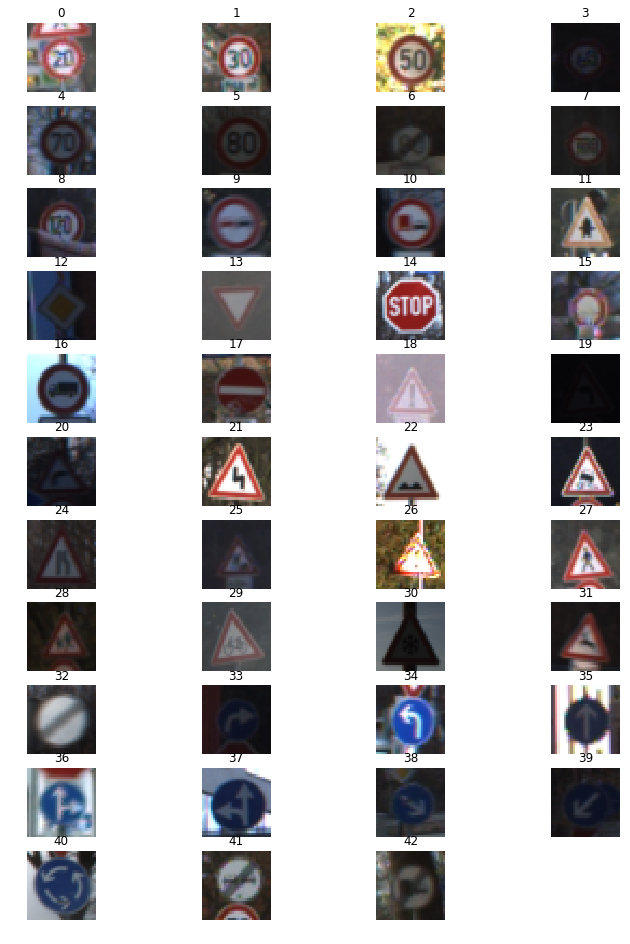

In [76]:
    
img_viewof_dataset(X_train,y_train)    

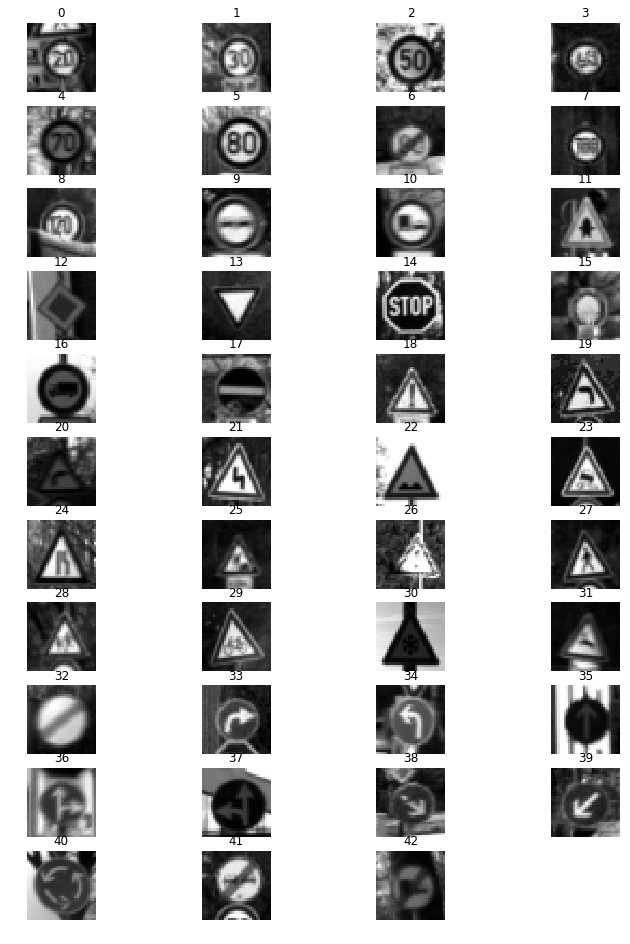

In [77]:
# Converting to grayscale 

a_train, a_train_view = convert_images_to_grayscale(X_train)
a_validation, a_validation_view = convert_images_to_grayscale(X_validation)
a_test, a_test_view = convert_images_to_grayscale(X_test)

img_viewof_dataset(a_train_view,y_train)    

In [78]:
#normalizing the image

a_train=normalize_image(a_train)
a_validation = normalize_image(a_validation)
a_test = normalize_image(a_test)


In [79]:

# TODO: Number of training examples
n_train =len(a_train)

# TODO: Number of validation examples
n_validation = len(y_validation)

# TODO: Number of testing examples.
n_test = len(a_test)

# TODO: What's the shape of an traffic sign image?
image_shape = a_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


In [80]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 100
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma)) #changed here
    fc3_b  = tf.Variable(tf.zeros(43)) #changed here
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



In [81]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [82]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [83]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(a_train) #changed here
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        a_train, y_train = shuffle(a_train, y_train) # changed here
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = a_train[offset:end], y_train[offset:end] #changed here
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(a_validation, y_validation) #changed here
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.779

EPOCH 2 ...
Validation Accuracy = 0.831

EPOCH 3 ...
Validation Accuracy = 0.871

EPOCH 4 ...
Validation Accuracy = 0.875

EPOCH 5 ...
Validation Accuracy = 0.885

EPOCH 6 ...
Validation Accuracy = 0.874

EPOCH 7 ...
Validation Accuracy = 0.893

EPOCH 8 ...
Validation Accuracy = 0.894

EPOCH 9 ...
Validation Accuracy = 0.898

EPOCH 10 ...
Validation Accuracy = 0.898

EPOCH 11 ...
Validation Accuracy = 0.903

EPOCH 12 ...
Validation Accuracy = 0.895

EPOCH 13 ...
Validation Accuracy = 0.902

EPOCH 14 ...
Validation Accuracy = 0.912

EPOCH 15 ...
Validation Accuracy = 0.893

EPOCH 16 ...
Validation Accuracy = 0.895

EPOCH 17 ...
Validation Accuracy = 0.907

EPOCH 18 ...
Validation Accuracy = 0.895

EPOCH 19 ...
Validation Accuracy = 0.906

EPOCH 20 ...
Validation Accuracy = 0.910

EPOCH 21 ...
Validation Accuracy = 0.899

EPOCH 22 ...
Validation Accuracy = 0.899

EPOCH 23 ...
Validation Accuracy = 0.902

EPOCH 24 ...
Validation Accura

In [84]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(a_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.927


In [85]:
from zipfile import ZipFile
from PIL import Image
from resizeimage import resizeimage
from tqdm import tqdm


def uncompress_features_labels(file):
    """
    Uncompress features and labels from a zip file
    :param file: The zip file to extract the data from
    """
    features = []
    #labels = []

    with ZipFile(file) as zipf:
        # Progress Bar
        filenames_pbar = tqdm(zipf.namelist(), unit='files')
        
        # Get features and labels from all files
        for filename in filenames_pbar:
            # Check if the file is a directory
            if not filename.endswith('/'):
                with zipf.open(filename) as image_file:
                    image = Image.open(image_file)
                    image = resizeimage.resize_cover(image, [32, 32])
                    image.load()
                    # Load image data as 1 dimensional array
                    # We're using float32 to save on memory space
                    feature = np.array(image, dtype=np.float32)
                    
                # Get the the letter from the filename.  This is the letter of the image.
                #label = os.path.split(filename)[1][0]

                features.append(feature)
                #labels.append(label)
                
    return np.array(features)

X_web = uncompress_features_labels('GTSW.zip')
y_web = np.array([28,13,17,14,2])
X_web, y_web =shuffle(X_web, y_web)

100%|██████████| 6/6 [00:00<00:00, 464.37files/s]


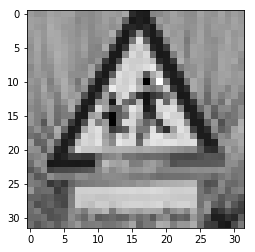

In [86]:

a_web, a_web_view = convert_images_to_grayscale(X_web)

plt.imshow(a_web_view[1], cmap='gray')

a_web = normalize_image(a_web)

In [87]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    web_accuracy = evaluate(a_web, y_web)
    print("Web images Accuracy = {:.3f}".format(web_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Web images Accuracy = 0.200
